In [265]:
import pandas as pd 
import numpy as np 


In [266]:
data=pd.read_csv(r"C:\Users\Azhar computer\Documents\datasets\electric_vehicles_spec_2025.csv.csv")

In [267]:
data.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [268]:
data.shape

(478, 22)

In [269]:
data.drop(columns=["model","battery_type","segment","car_body_type","source_url","towing_capacity_kg","fast_charge_port","brand","drivetrain"],inplace=True)

In [270]:
data.head()

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,cargo_volume_l,seats,length_mm,width_mm,height_mm
0,155,37.8,192.0,235.0,156,225,7.0,67.0,185,4,3673,1683,1518
1,155,37.8,192.0,235.0,149,225,7.0,67.0,185,4,3673,1683,1518
2,200,50.8,102.0,345.0,158,280,5.9,79.0,360,5,4187,1779,1557
3,200,50.8,102.0,345.0,158,280,6.2,79.0,360,5,4187,1779,1557
4,150,60.0,NaN,310.0,156,315,7.5,78.0,496,5,4680,1865,1700


In [271]:
data["volume_in_10lac"]=(data["length_mm"] * data["width_mm"] * data["height_mm"] / 1000000).astype(np.int32)

In [272]:
data.drop(columns=["width_mm","height_mm","length_mm","acceleration_0_100_s","number_of_cells","torque_nm","cargo_volume_l"],inplace=True)

In [273]:
data.head()

,top_speed_kmh,battery_capacity_kWh,efficiency_wh_per_km,range_km,fast_charging_power_kw_dc,seats,volume_in_10lac
0,155,37.8,156,225,67.0,4,9383
1,155,37.8,149,225,67.0,4,9383
2,200,50.8,158,280,79.0,5,11597
3,200,50.8,158,280,79.0,5,11597
4,150,60.0,156,315,78.0,5,14837


In [274]:
data.dropna(inplace=True)

In [275]:
data.isnull().sum()

top_speed_kmh                0
battery_capacity_kWh         0
efficiency_wh_per_km         0
range_km                     0
fast_charging_power_kw_dc    0
seats                        0
volume_in_10lac              0
dtype: int64

In [276]:
data.describe()

,top_speed_kmh,battery_capacity_kWh,efficiency_wh_per_km,range_km,fast_charging_power_kw_dc,seats,volume_in_10lac
count,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000
mean,185.603774,74.115094,162.974843,393.469602,125.008386,5.264151,14214.457023
std,34.194086,20.292372,34.318323,103.201207,58.205012,1.004943,2220.747837
min,125.000000,21.300000,109.000000,135.000000,29.000000,2.000000,9098.000000
25%,160.000000,60.000000,143.000000,320.000000,80.000000,5.000000,12861.000000
50%,180.000000,76.500000,155.000000,400.000000,113.000000,5.000000,13964.000000
75%,201.000000,90.600000,178.000000,470.000000,150.000000,5.000000,15336.000000
max,325.000000,118.000000,370.000000,685.000000,281.000000,9.000000,23135.000000


In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477 entries, 0 to 477
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   top_speed_kmh              477 non-null    int64  
 1   battery_capacity_kWh       477 non-null    float64
 2   efficiency_wh_per_km       477 non-null    int64  
 3   range_km                   477 non-null    int64  
 4   fast_charging_power_kw_dc  477 non-null    float64
 5   seats                      477 non-null    int64  
 6   volume_in_10lac            477 non-null    int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 27.9 KB


In [278]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [279]:

y_train.shape

(381,)

In [280]:
from sklearn.preprocessing import MinMaxScaler
ss=MinMaxScaler()
x_train_new=ss.fit_transform(x_train)
x_test_new=ss.transform(x_test)

In [281]:
from sklearn.linear_model import  LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [282]:
l=LinearRegression(n_jobs=-1)

l.fit(x_train_new,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [283]:
rf=RandomForestRegressor(n_jobs=-1)
rf.fit(x_train_new,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [284]:
y_pred1=l.predict(x_test_new)
print("LinearRegression")
r2_score(y_pred1,y_test)

LinearRegression


0.7314981924478239

In [285]:
y_pred2=rf.predict(x_test_new)
print("Randomforest")
r2_score(y_pred2,y_test)

Randomforest


0.8799060650132786

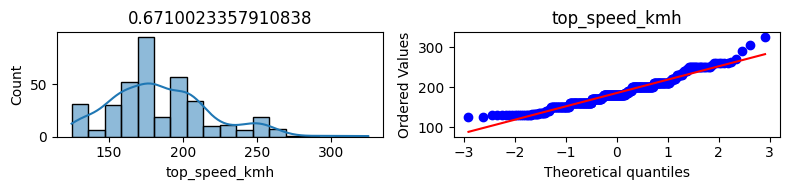

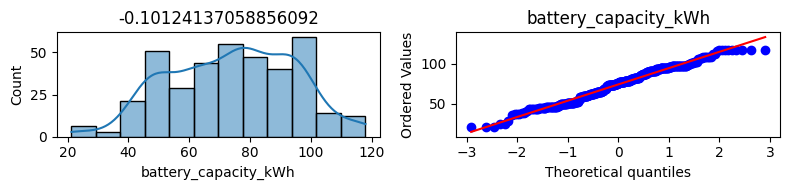

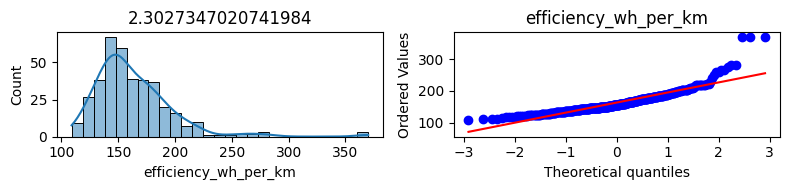

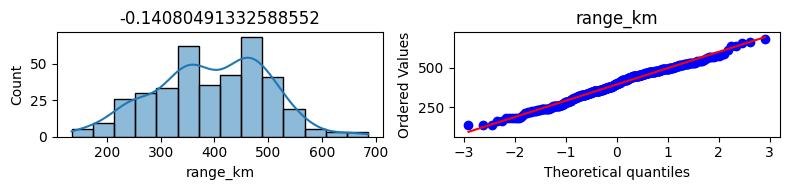

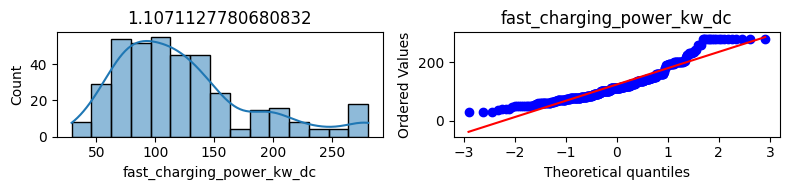

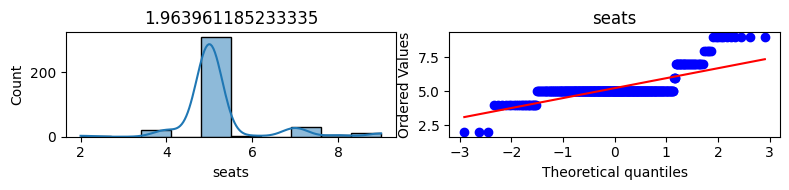

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

for col in x_train.columns:
    plt.figure(figsize=(8, 2))

    # Subplot 1: Distribution Plot
    plt.subplot(1, 2, 1)
    sns.histplot(x_train[col], kde=True)  # displot replaced with histplot for inline subplot
    plt.title(x_train[col].skew())

    # Subplot 2: Q-Q Plot
    plt.subplot(1, 2, 2)
    stat.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.tight_layout()
    plt.show()


In [287]:
from sklearn.preprocessing import PowerTransformer

In [288]:
pt=PowerTransformer(method="box-cox")
pt.fit(x_train)

,method,'box-cox'
,standardize,True
,copy,True


In [289]:
x_train_transformed=pt.fit_transform(x_train)
x_test_transformed=pt.transform(x_test)
box_cox_lambda=pd.DataFrame({"cols":x_train.columns,"BOX-cox_lambda":pt.lambdas_})
box_cox_lambda

,cols,BOX-cox_lambda
0,top_speed_kmh,-0.313767
1,battery_capacity_kWh,1.051754
2,efficiency_wh_per_km,-1.490787
3,range_km,1.127793
4,fast_charging_power_kw_dc,-0.004811
5,seats,-0.059088


In [290]:
lt=LinearRegression(n_jobs=-1)

lt.fit(x_train_transformed,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [291]:
rt=RandomForestRegressor(n_jobs=-1)
rt.fit(x_train_transformed,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [292]:
y_pred_transformed=lt.predict(x_test_transformed)
print("LinearRegression")
r2_score(y_pred_transformed,y_test)

LinearRegression


0.6806353627469028

In [293]:
y_pred_transformed=rt.predict(x_test_transformed)
print("Randomforest")
r2_score(y_pred_transformed,y_test)

Randomforest


0.8780972443240089

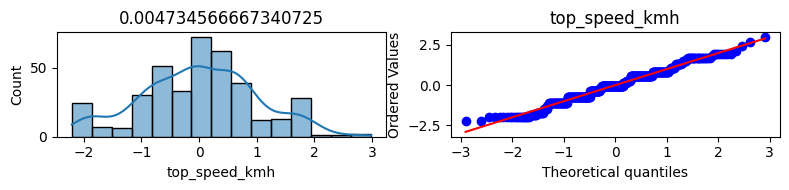

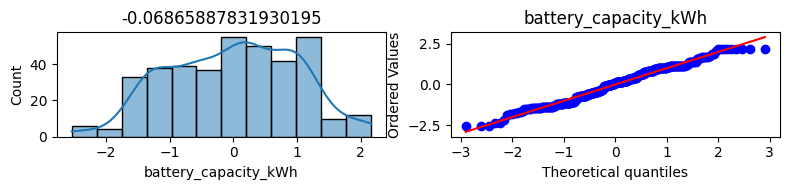

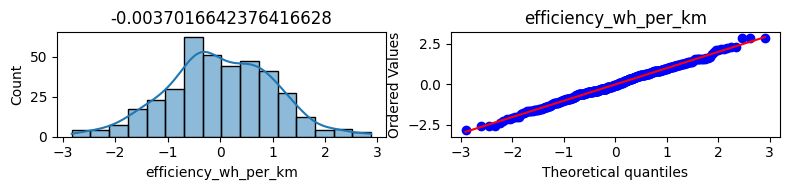

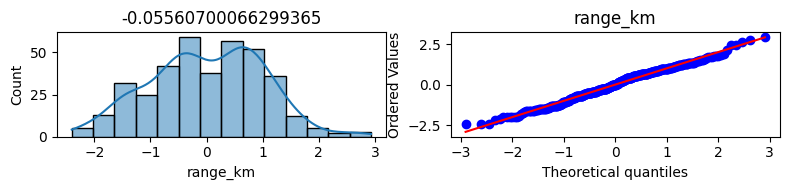

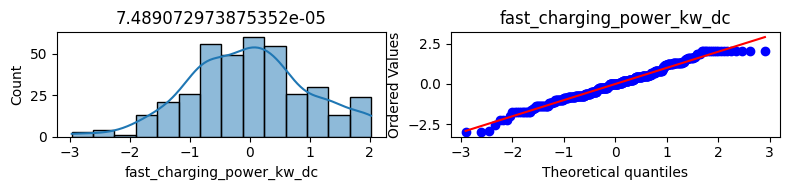

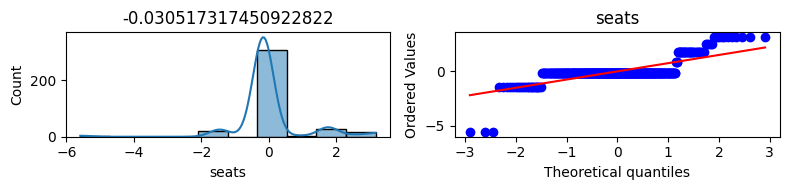

In [294]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
x_train_transformed=pd.DataFrame(x_train_transformed,columns=x_train.columns)

for col in x_train_transformed.columns:
    plt.figure(figsize=(8, 2))

    # Subplot 1: Distribution Plot
    plt.subplot(1, 2, 1)
    sns.histplot(x_train_transformed[col], kde=True)  # displot replaced with histplot for inline subplot
    plt.title(x_train_transformed[col].skew())

    # Subplot 2: Q-Q Plot
    plt.subplot(1, 2, 2)
    stat.probplot(x_train_transformed[col], dist="norm", plot=plt)
    plt.title(col)

    plt.tight_layout()
    plt.show()


In [295]:
pt=PowerTransformer()
pt.fit(x_train)

,method,'yeo-johnson'
,standardize,True
,copy,True


In [296]:
x_train_transformed=pt.fit_transform(x_train)
x_test_transformed=pt.transform(x_test)
yeo_johnson_lamda=pd.DataFrame({"cols":x_train.columns,"yeo-johnson-lambda":pt.lambdas_})
yeo_johnson_lamda

,cols,yeo-johnson-lambda
0,top_speed_kmh,-0.320729
1,battery_capacity_kWh,1.054251
2,efficiency_wh_per_km,-1.505352
3,range_km,1.128447
4,fast_charging_power_kw_dc,-0.015327
5,seats,-0.356450


In [297]:
lt=LinearRegression(n_jobs=-1)

lt.fit(x_train_transformed,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [298]:
rt=RandomForestRegressor(n_jobs=-1)
rt.fit(x_train_transformed,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [299]:
y_pred_transformed=lt.predict(x_test_transformed)
print("LinearRegression")
r2_score(y_pred_transformed,y_test)

LinearRegression


0.6787400532100982

In [300]:
y_pred_transformed=rt.predict(x_test_transformed)
print("Randomforest")
r2_score(y_pred_transformed,y_test)

Randomforest


0.867118383810546

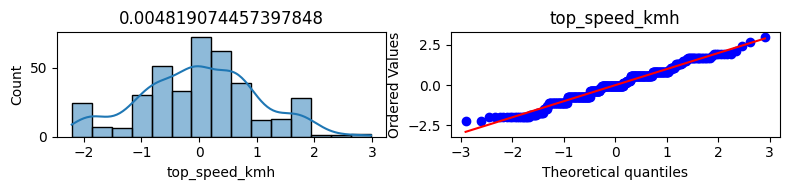

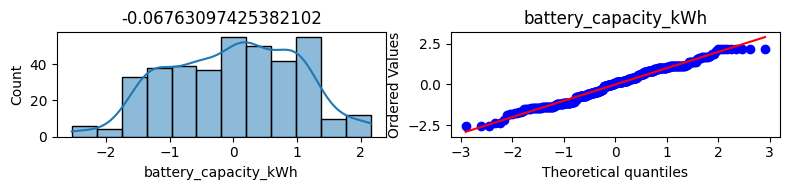

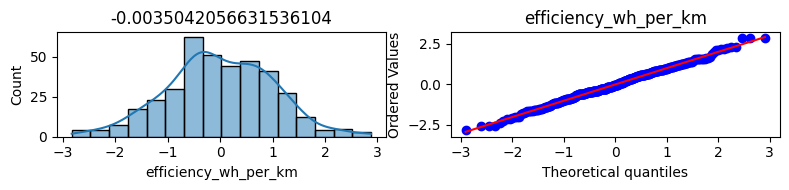

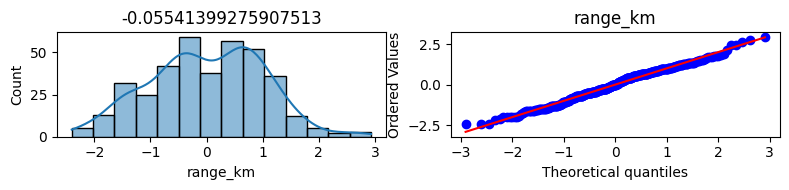

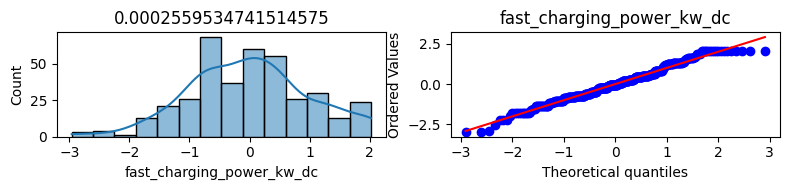

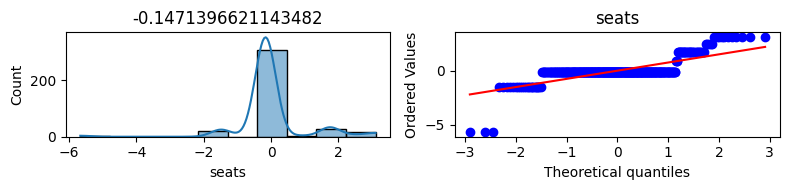

In [301]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
x_train_transformed=pd.DataFrame(x_train_transformed,columns=x_train.columns)

for col in x_train_transformed.columns:
    plt.figure(figsize=(8, 2))

    # Subplot 1: Distribution Plot
    plt.subplot(1, 2, 1)
    sns.histplot(x_train_transformed[col], kde=True)  # displot replaced with histplot for inline subplot
    plt.title(x_train_transformed[col].skew())

    # Subplot 2: Q-Q Plot
    plt.subplot(1, 2, 2)
    stat.probplot(x_train_transformed[col], dist="norm", plot=plt)
    plt.title(col)

    plt.tight_layout()
    plt.show()


In [302]:
pd.concat([box_cox_lambda,yeo_johnson_lamda],axis=1)

,cols,BOX-cox_lambda,cols,yeo-johnson-lambda
0,top_speed_kmh,-0.313767,top_speed_kmh,-0.320729
1,battery_capacity_kWh,1.051754,battery_capacity_kWh,1.054251
2,efficiency_wh_per_km,-1.490787,efficiency_wh_per_km,-1.505352
3,range_km,1.127793,range_km,1.128447
4,fast_charging_power_kw_dc,-0.004811,fast_charging_power_kw_dc,-0.015327
5,seats,-0.059088,seats,-0.356450
